In [1]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,NuSVC
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics as met
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be remo

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
pID = test['PassengerId']
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


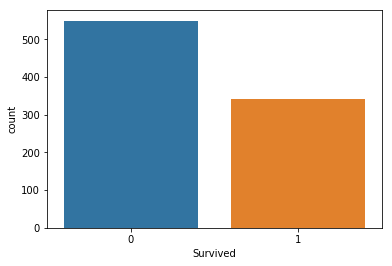

In [7]:
sns.countplot(x='Survived',data=train)

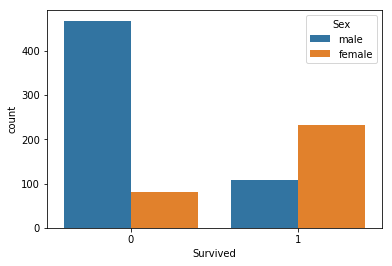

In [8]:
sns.countplot(x='Survived',hue = 'Sex',data = train)

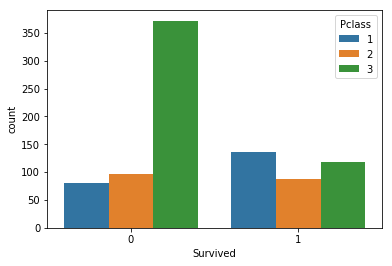

In [9]:
sns.countplot(x='Survived',hue = 'Pclass',data = train)

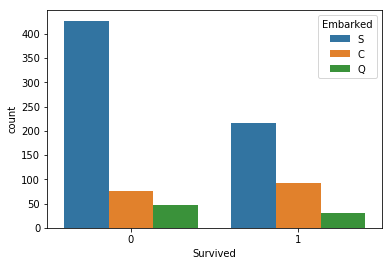

In [10]:
sns.countplot(x='Survived',hue = 'Embarked',data = train)

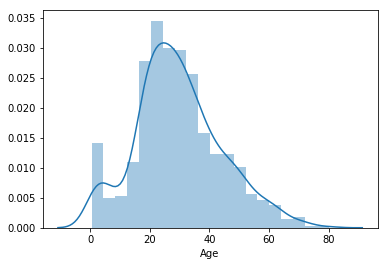

In [11]:
sns.distplot(train.Age.dropna())

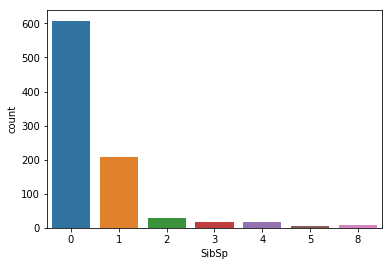

In [12]:
sns.countplot(x='SibSp',data=train)

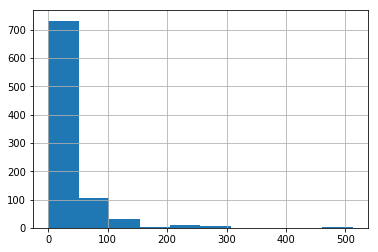

In [13]:
train.Fare.hist()

In [14]:
print(train.isna().sum().sort_values(ascending=False)[:4])
print(test.isna().sum().sort_values(ascending=False)[:4])

Cabin       687
Age         177
Embarked      2
Fare          0
dtype: int64
Cabin       327
Age          86
Fare          1
Embarked      0
dtype: int64


In [15]:
for data in [train,test]:
    data['Age'].fillna(data['Age'].median(),inplace=True)
    
    data['Embarked'].fillna(method='ffill',inplace=True)
    
    data['Fare'].fillna(method='ffill',inplace=True)
    
drop = ['PassengerId','Cabin','Ticket','Name']
train.drop(drop,axis=1,inplace=True)
test.drop(drop,axis=1,inplace=True)

In [16]:
# feature Engineerig

for data in [train,test]:
    data['FamilySize'] = data['SibSp']+ data['Parch'] + 1
    
    data['IsAlone'] = 1
    data['IsAlone'].loc[data['FamilySize'] >1 ] = 0

In [17]:
train_y = train.Survived
train_x = train.drop('Survived',axis=1)

In [18]:
train_x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone'],
      dtype='object')

In [19]:
dummy  = ['Pclass','Sex','Embarked']
train_x[dummy]=train_x[dummy].astype('category')
train_X  = pd.get_dummies(train_x[dummy],drop_first=True,prefix =dummy)
train_X = pd.concat([train_x,train_X],axis=1)
train_X.drop(dummy,axis=1,inplace=True)
train_X.shape

(891, 11)

In [20]:
test[dummy]=test[dummy].astype('category')
test_X  = pd.get_dummies(test[dummy],drop_first=True,prefix =dummy)
test_X = pd.concat([test,test_X],axis=1)
test_X.drop(dummy,axis=1,inplace=True)
test_X.shape

(418, 11)

In [21]:
ss= MinMaxScaler()
train_X = ss.fit_transform(train_X)
test = ss.fit_transform(test_X)

In [22]:
classifiers = {'Gradient Boosting Classifier': GradientBoostingClassifier(),'Ada Boost Classifier':AdaBoostClassifier(),'RadiusNN':RadiusNeighborsClassifier(radius=40.0),'Linear Discriminant Analyis': LinearDiscriminantAnalysis(),'GaussianNB':GaussianNB(),'BerNB':BernoulliNB(),'KNN':KNeighborsClassifier(),'Random Forest Classifier': RandomForestClassifier(min_samples_leaf=10,min_samples_split=20,max_depth=4),'Decision Tree Classifier' : DecisionTreeClassifier(),'Logistic Regression': LogisticRegression(),'XGBoost': xgb.XGBClassifier()}

In [23]:
#Splitting Data
train_X,test_X,train_y,test_y = train_test_split(train_X,train_y,test_size=0.2,random_state = 1)

In [24]:
base_accuracy = 0 
for Name,classify in classifiers.items():
    classify.fit(train_X,train_y)
    predicting_y = classify.predict(test_X)
    print('Accuracy Score of ' + str(Name) + ":"+ str(met.accuracy_score(test_y,predicting_y)))
    
    if met.accuracy_score(test_y,predicting_y) > base_accuracy:
        prediction_test = classify.predict(test)
        base_accuracy = met.accuracy_score(test_y,predicting_y)
    else:
        continue
# Generate Submission File
predicted_test_values = pd.DataFrame({'PassengerId': pID,'Survived' :prediction_test })
predicted_test_values.to_csv('PredictedTestScore.csv',index = False)

Accuracy Score of Gradient Boosting Classifier:0.7821229050279329
Accuracy Score of Ada Boost Classifier:0.776536312849162
Accuracy Score of RadiusNN:0.5921787709497207
Accuracy Score of Linear Discriminant Analyis:0.7932960893854749
Accuracy Score of GaussianNB:0.7374301675977654
Accuracy Score of BerNB:0.7150837988826816
Accuracy Score of KNN:0.7597765363128491
Accuracy Score of Random Forest Classifier:0.7653631284916201
Accuracy Score of Decision Tree Classifier:0.7318435754189944
Accuracy Score of Logistic Regression:0.7932960893854749
Accuracy Score of XGBoost:0.7821229050279329
